In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from mlxtend.plotting import plot_learning_curves
from yellowbrick.model_selection import LearningCurve
import matplotlib.gridspec as gridspec
import itertools
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

**Função para gerenciar tempo**

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        tmin, tsec = divmod((datetime.now() - start_time).total_seconds(), 60)
        print('\n Tempo Necessário: %i minutos and %s segundos.' % (tmin, round(tsec, 2)))

**Importação das Bases - Trocaar para base de testes somente após ajustes na validação**  
**Verificação dos formatos**

In [3]:
train = pd.read_csv('train.csv')
X_train = train.iloc[:,1:68] #inserir quantidade de características
Y_train = train.loc[:, train.columns == 'Y'] #inserir label da viriável alvo
test = pd.read_csv('validation.csv')
X_test = test.iloc[:,1:68] #inserir quantidade de características
Y_test = test.loc[:, test.columns == 'Y'] #inserir label da viriável alvo

In [4]:
print(X_train.shape)

(109992, 67)


In [5]:
print(X_test.shape)

(43997, 67)


In [6]:
X_train.head()

,v1,v3,v6,v7,v8,v9,v10,v16,v17,v18,...,v687,v689,v690,v691,v694,v56,v64,v72,v74,v78
0,0,0,0,0,0,0,0,0,0,0,...,-1.00,-1.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,100.00,-1.00,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,99.90,-1.00,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,-1.00,-1.00,1.0,1.0,0,0.0,0.0,4330.0,2260.0,1800.0
4,0,0,0,0,0,0,0,0,0,0,...,54.83,21.66,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0


**Voting Ensemble**

/home/nakayama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of it


 Tempo Necessário: 7 minutos and 6.34 segundos.


<Figure size 432x288 with 0 Axes>

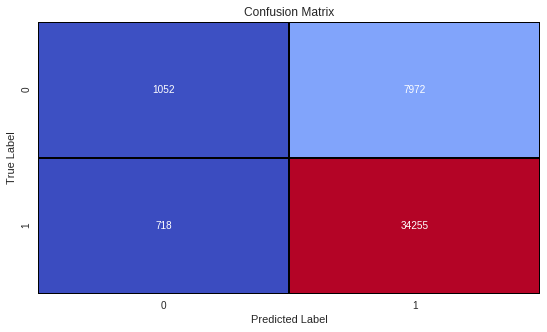

<Figure size 432x288 with 0 Axes>

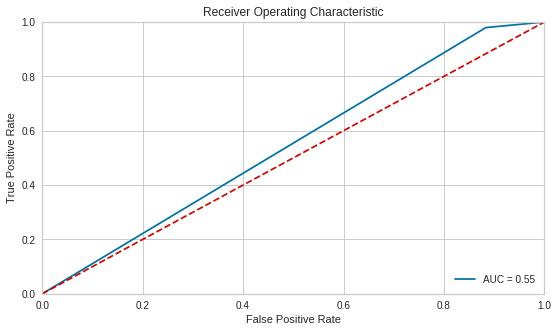

<Figure size 432x288 with 0 Axes>

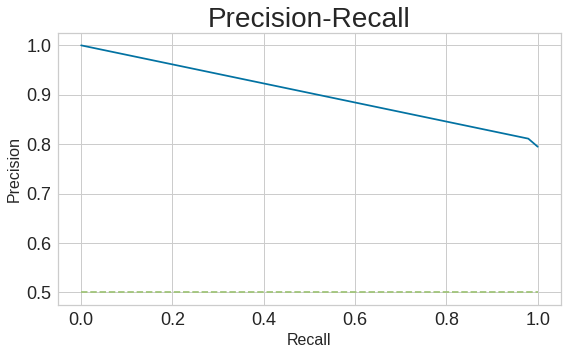

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.12      0.19      9024
           1       0.81      0.98      0.89     34973

    accuracy                           0.80     43997
   macro avg       0.70      0.55      0.54     43997
weighted avg       0.77      0.80      0.75     43997

Acurácia do Modelo


0.8024865331727163

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
starttime = timer(None)
start_time = timer(None)

model1 = RandomForestClassifier(n_estimators=250, criterion='entropy',  n_jobs = 2,  random_state=0)
model2 = XGBClassifier(n_estimators=250,  n_jobs = 2)
model3 = LogisticRegression(random_state=1)
model4 = AdaBoostClassifier(n_estimators=100)
model = VotingClassifier(estimators=[('rf', model1), ('rf2', model2), ('bknn', model2), ('ada', model3),], voting='hard')
model.fit(X_train,Y_train.values.ravel())
model.score(X_test,Y_test.values.ravel())
predictions_model = model.predict(X_test)
scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=3)
timer(start_time)

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions_model)
roc_auc = auc(false_positive_rate, true_positive_rate)
matrix_model = confusion_matrix(Y_test, predictions_model)



plt.figure(1)
plt.figure(figsize=(9,5))
model_heatmap = sns.heatmap(matrix_model,annot=True, cbar=False, fmt="d", cmap ='coolwarm', linecolor ='black', linewidths = 1)
bottom, top = model_heatmap.get_ylim()
model_heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

plt.figure(2)
plt.figure(figsize=(9,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure(3)
precision, recall, thresholds = precision_recall_curve(Y_test, predictions_model)
plt.figure(figsize = (9,5))
plt.plot(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle = '--')
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Precision-Recall', fontsize = 28)
plt.show();


print("Classification Report")
print(classification_report(Y_test, predictions_model))

print("Acurácia do Modelo")
accuracy_score(Y_test, predictions_model)

/home/nakayama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nakayama/.local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of it

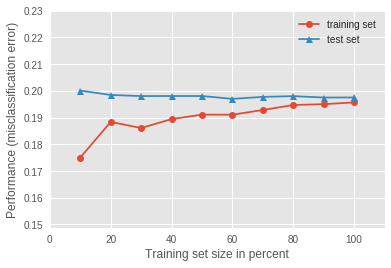

In [9]:
plt.figure()
plot_learning_curves(X_train, Y_train.values.ravel(), X_test, Y_test.values.ravel(), model, print_model=False, style='ggplot')
plt.show()